In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://www.ishelp.info/data/imdb.csv')
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


**Correlation**: Check for any numerical variables that may be correlated.

In [4]:
df.corr(numeric_only=True)

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


**Choose two numerical variables** for further investigation

**Scatterplot**: Graph them together. Choose which one you want to place on the x-axis and y-axis. This will mean that as x increases, how is y affected? In our plot, as Runtime in minutes increases, does the Rating go up or down? (or not at all?)

**Check Assumptions**:
* **Continuous Data**: Are there any groupings of points anywhere?
* **Linear Relationship**: Does that pattern follow a straight line or a curve?
* **Equal Variance (Heteroscedasticity)**: When the line is finally plotted, does that data *vary* around the line evenly, or are there some areas where the points vary widely and others where the points are close to the line? (**PS. We call these *residuals*, or the distance from each point away from the line**)

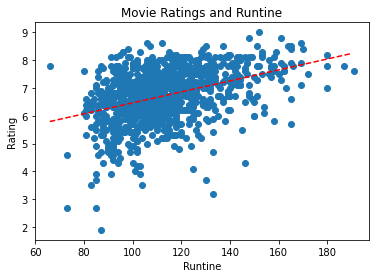

In [16]:
from scipy import stats

plt.scatter(df['Runtime (Minutes)'], df['Rating'])
plt.title('Movie Ratings and Runtine')
plt.xlabel('Runtine')
plt.ylabel('Rating')

# stats.linregress gives the slope, intercept, correlation, and some stats for your line model
# Save each of these stats as m, b, r, etc., so they can be easily read and retrieved
m, b, r, p, err = stats.linregress(df['Runtime (Minutes)'], df['Rating'])

# Because Runtime has parantheses and spaces in the column title, save the column with a new variable name
Runtime = df['Runtime (Minutes)']
Rating = df.Rating

# Remember in class how we saw so much space in the plot? The x-axis included runtimes that were lower than any movie in our dataset
# Save the maximum and minimum runtimes in our dataset, then tell Python that this is the range we want to use for runtime
numMAX = Runtime.max()
numMIN = Runtime.min()
xAXIS = range(numMIN,numMAX)

# plot(x-axis, model, color) - this will plot the linear regression model based on our data
plt.plot(xAXIS, m * xAXIS + b, "r--")
plt.show()

**Interpretation**: As runtime increases, so does rating... right?

**Assumptions**: 
* **Continuous Data**: No weird groupings--the data seems pretty evenly spread
* **Linear Relationship**: No weird patterns--the data seems to follow a straight line, even if not perfectly
* **Equal Variance**: For lower runtimes, there are lots of movies with very high ratings and very low ratings, but for higher runtimes, most movies have higher ratings. The linear regression model doesn't explain ratings for lower runtimes--we have a problem, but let's double check.

In [12]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# This is a different way of calculating our regression model
# This has all sorts of stats included, like RESIDUALS, which we will use in our tests below
model = ols(formula='Rating~Runtime', data=df).fit()

# We saved the linear regression model as 'model'
# One of our options to view are the parameters, using the following code
model.params

Intercept    4.492293
Runtime      0.019713
dtype: float64

**Interpretation**: Rating = 0.0197 Runtime + 4.492

This model is telling us that for every increase in runtime minutes, our rating goes up. However, for lower runtime movies, our ratings are all over the place. This model doesn't take this into account.

To **verify** if we have a problem with **equal variance** around the line, plug-and-chug our dataset into the following tests.

**White and Breusch-Pagan (BP) Tests**: We are *testing for* a problem with Equal Variance. Therefore, a low p-value means there's a problem with Equal Variance.

In [13]:
# Use the above 'model', but the residuals, etc., and plug-and-chug
white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

# Round to 5 decimal places
output_df.round(5)

,LM stat,LM p-value,F-stat,F p-value
White,22.82917,0.00001,11.64621,0.00001
Breusch-Pagan,11.73984,0.00061,11.85554,0.00060


**Interpretation**: Low p-values means there IS a problem with Equal Variance, our third assumption. Remember, we are testing *for a problem* with this test, so a p-value under 0.05 *indicates a problem*.

Our model doesn't work, because for low runtime movies, the ratings are all over the place. We can't trust the regression model. However, this is GOOD, because we found something meaningful, *even if we simply state that, for now, we can't predict the rating of a movie by its runtime.*

Also, with this information, we can perhaps look for a better model with some further tools at our disposal.